In [1]:
import os
import random
import cv2
import numpy as np

In [2]:
input_layer = 76800
hidden_layer = 480
output_layer = 3

class MLP_weight:
    def __init__(self):
        
        self.weight_input_hidden = np.empty([input_layer, hidden_layer])
        self.bias_input_hidden = np.empty([input_layer, hidden_layer])
        
        self.weight_hidden_output = np.empty([hidden_layer, output_layer])
        self.bias_hidden_output = np.empty(output_layer)

In [3]:
def labelling(data_dir):
    dataset = []
    for label in os.listdir(data_dir):
        label_path = os.path.join(data_dir, label)
        for data in os.listdir(label_path):
            data_path = os.path.join(label_path, data)
            if label == 'rose':
                label_encoded = np.array([1, 0, 0])
            elif label == 'dandelion':
                label_encoded = np.array([0, 1, 0])
            elif label == 'sunflower':
                label_encoded = np.array([0, 0, 1])
            dataset.append((label_encoded, data_path))
    return dataset

In [4]:
train_dir = labelling('flowers/Training')
test_dir = labelling('flowers/Testing')

In [5]:
random.shuffle(train_dir)
random.shuffle(test_dir)

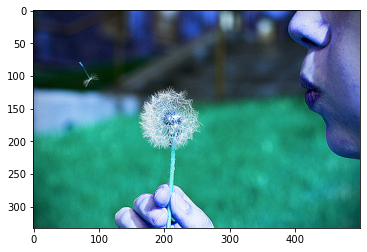

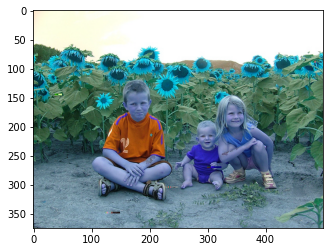

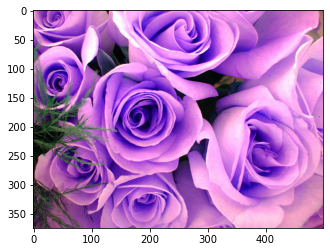

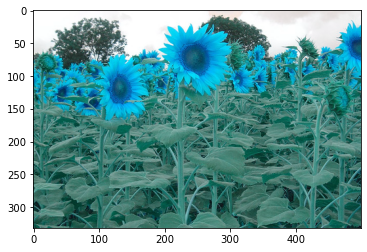

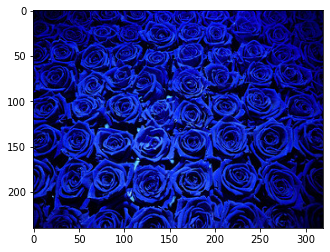

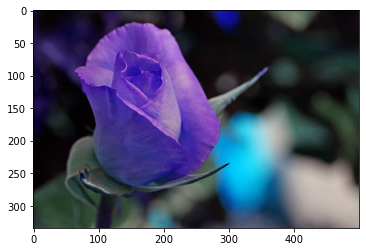

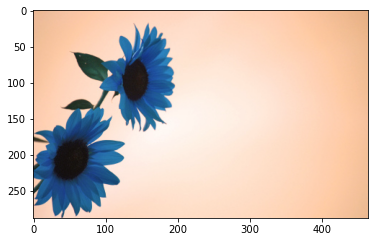

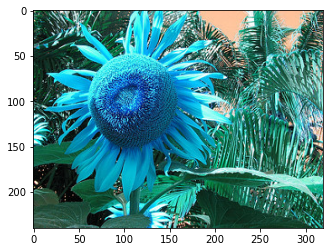

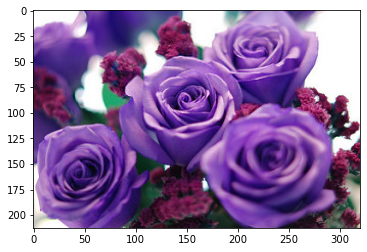

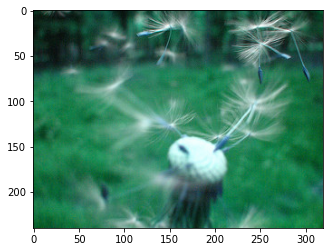

In [6]:
from matplotlib import pyplot as plt

#Import image
for i in range(10):
    image = cv2.imread(train_dir[i][1])
#Show the image with matplotlib
    plt.imshow(image)
    plt.show()
    


In [7]:
def image_preprocess(img):
  # lakukan preprocessing pada gambar
  # resize ke 320x240
    processed_image = cv2.resize(img, (320, 240))
  # ubah ke grayscale
    processed_image = cv2.cvtColor(processed_image, cv2.COLOR_BGR2GRAY)
  # ubah gambar ke 1 dimensi
    processed_image = processed_image.flatten()
    return processed_image

In [8]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [9]:
def init_backprop(model):
    model.weight_input_hidden = np.random.normal(0, 2/input_layer, (input_layer, hidden_layer))
    model.bias_input_hidden = np.random.normal(0, 2/input_layer, hidden_layer)
    
    model.weight_hidden_output = np.random.normal(0, 2/hidden_layer, (hidden_layer, output_layer))
    model.bias_hidden_output = np.random.normal(0, 2/hidden_layer, output_layer)

In [10]:
def calc_err(label, output):
    return ((label - output[0])**2)/2

In [11]:
def calc_output(inputs, model):
    hidden_y = sigmoid(np.dot(inputs, model.weight_input_hidden) + model.bias_input_hidden)
    output_y = sigmoid(np.dot(hidden_y, model.weight_hidden_output) + model.bias_hidden_output)

    return output_y, hidden_y

In [24]:
def update_weight(label, input, model, learning_rate):
    output_y, hidden_y = calc_output(input, model)

    # reshape dan transpose matriks agar dapat dicari dot productnya
    hidden_y = hidden_y.reshape((len(hidden_y), 1))
    output_y = output_y.reshape((1, len(output_y)))
    input_reshaped = input.reshape((len(input), 1))

    # hitung error
    output_error = calc_err(label, output_y)

    # hitung dtheta hidden-output
    derivative_hidden_output = (output_y - label) * output_y * (1 - output_y)
    dtheta_hidden_output = np.dot(hidden_y, derivative_hidden_output)

    # hitung dtheta input-hidden
    hidden_error = np.dot(model.weight_hidden_output, derivative_hidden_output.T)
    derivative_input_hidden = hidden_error * hidden_y * (1 - hidden_y)
    derivative_input_hidden = derivative_input_hidden.reshape((1, len(derivative_input_hidden)))
    dtheta_input_hidden = np.dot(input_reshaped, derivative_input_hidden)

    # update theta
    model.weight_hidden_output -= learning_rate * dtheta_hidden_output / len(train_dir)
    model.bias_hidden_output -= learning_rate * derivative_hidden_output[0] / len(train_dir)
    model.weight_input_hidden -= learning_rate * dtheta_input_hidden / len(train_dir)
    model.bias_input_hidden -= learning_rate * derivative_input_hidden[0] / len(train_dir)

    # return total error baru
    return np.sum(calc_err(label, calc_output(input, model)[0]))

In [25]:
def predict(input, model):
    output, _ = calc_output(input, model)
    # ambil index hipotesis dengan probabilitas paling tinggi
    return np.argmax(output)

In [26]:
def calc_accuracy(model):
    correct_count = 0
    for label, img_path in test_dir:
        img = image_preprocess(cv2.imread(img_path))
        if np.argmax(label) == predict(img, model):
            correct_count += 1
    return correct_count / len(test_dir)

In [27]:
def train(model, epoch, lr):
    errors = []
    accuracies = []
    for cur_epoch in range(epoch):
        print(cur_epoch)
        cur_error = 0
        for label, img_path in train_dir:
            img = image_preprocess(cv2.imread(img_path))
            output = calc_output(img, model)
            cur_error += calc_err(label, output)
            update_weight(label, img, model, lr)
        errors.append(sum(cur_error)/len(train_dir))
        accuracies.append(calc_accuracy(model))
    return errors, accuracies

In [28]:
import matplotlib.pyplot as plt
 
# definisikan fungsi untuk memvisulisasikan error dan akurasi
def visualize(errors, accuracies):
    plt.plot(errors, 'r-')
    plt.plot(accuracies, 'b-')
    plt.show()

0
1
2
3
4
5
6
7
8
9


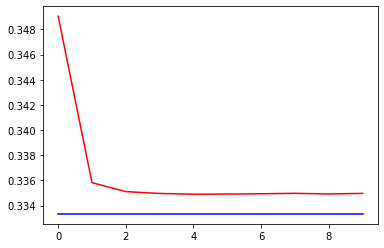

In [29]:
model_0_1 = MLP_weight()
init_backprop(model_0_1)
errors_0_1, accuracies_0_1 = train(model_0_1, 10, 0.1)
visualize(errors_0_1, accuracies_0_1)

In [32]:
print(errors_0_1)

[0.3490526142658156, 0.3358201927798137, 0.33510636351901424, 0.3349598246035743, 0.33490028312427994, 0.33491298530274494, 0.33493554264666014, 0.33497162255151414, 0.33492004645133655]


In [33]:
print(accuracies_0_1)

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
